In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Step 1: Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area",
         "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points",
         "Mean Symmetry", "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter",
         "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points",
         "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter",
         "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points",
         "Worst Symmetry", "Worst Fractal Dimension"]
data = pd.read_csv(url, names=names)

In [6]:
# Step 2: Pre-Processing the data
data.drop("ID", axis=1, inplace=True)  # Drop unnecessary ID column
X = data.drop("Diagnosis", axis=1)  # Features
y = data["Diagnosis"]  # Target

In [7]:
# Step 2: Check for null values
if data.isnull().sum().sum() == 0:
    print("No missing values in the dataset.")
else:
    print("Dataset contains missing values. Please handle them before proceeding.")

No missing values in the dataset.


In [8]:
# Step 3: Pre-Processing the data
if "ID" in data.columns:
    data.drop("ID", axis=1, inplace=True)  # Drop unnecessary ID column
else:
    print("ID column not found in the dataset.")

X = data.drop("Diagnosis", axis=1)  # Features
y = data["Diagnosis"]

ID column not found in the dataset.


In [9]:

# Step 6: Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [10]:

# Step 8: Test the model
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
     

In [11]:
# Step 9: Measure the performance of the trained model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)

Random Forest Accuracy: 0.9649122807017544
Gradient Boosting Accuracy: 0.956140350877193


In [12]:
# Step 10: Compare the results of each ensemble model using graphs
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

print("RF-CM:", f'{rf_cm}')

print("GB-CM:", f'{gb_cm}')

RF-CM: [[70  1]
 [ 3 40]]
GB-CM: [[69  2]
 [ 3 40]]


([<matplotlib.axis.YTick at 0x2689e486fb0>,
 [Text(0, 0, 'Benign'), Text(0, 1, 'Malignant')])

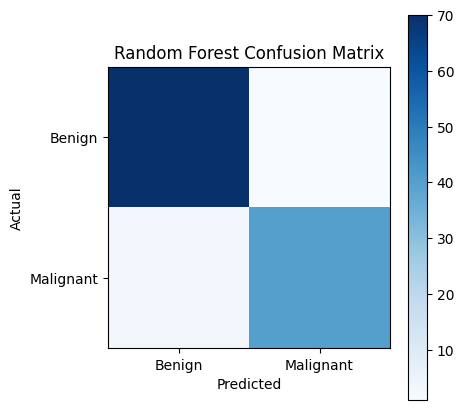

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Random Forest Confusion Matrix")
plt.imshow(rf_cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])

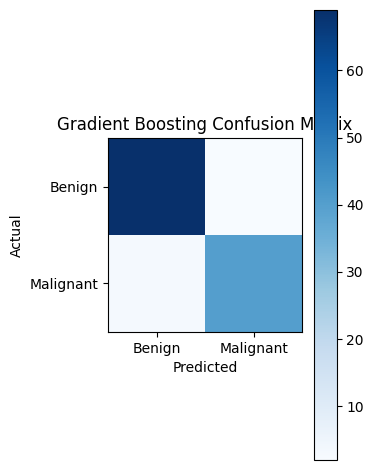

In [14]:

plt.subplot(1, 2, 2)
plt.title("Gradient Boosting Confusion Matrix")
plt.imshow(gb_cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])

plt.tight_layout()
plt.show()

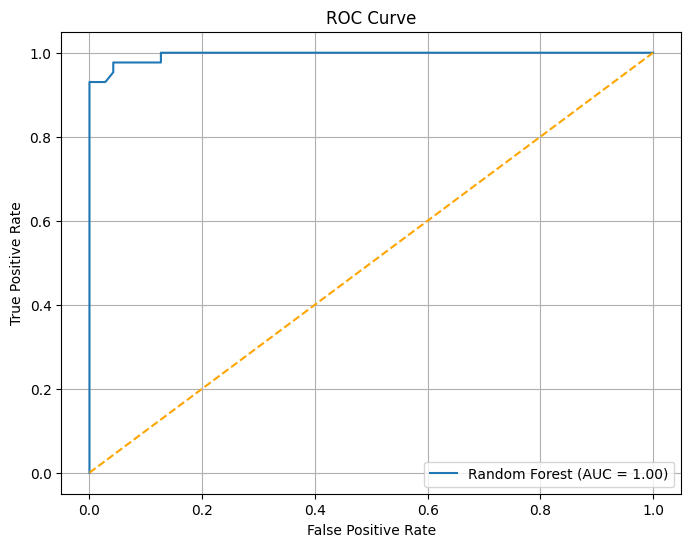

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Step 11: Represent the ROC of training and test results in the graphs
rf_probs = rf_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test_encoded, rf_probs, pos_label=label_encoder.transform(['M'])[0])
gb_fpr, gb_tpr, _ = roc_curve(y_test_encoded, gb_probs, pos_label=label_encoder.transform(['M'])[0])

rf_auc = auc(rf_fpr, rf_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

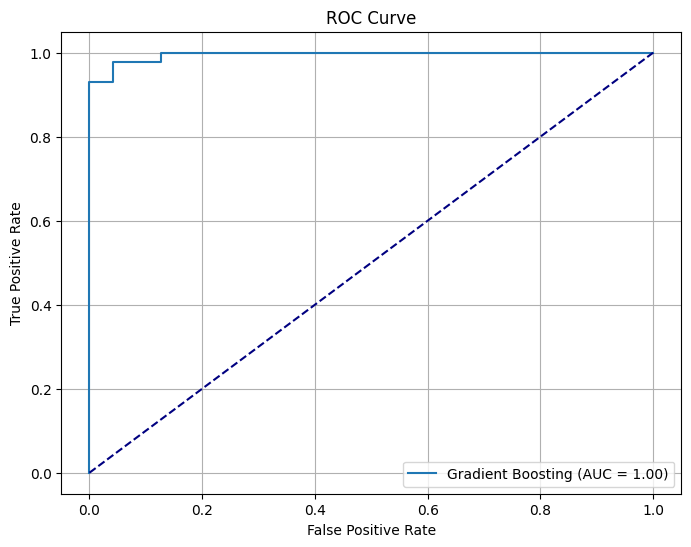

In [16]:

plt.figure(figsize=(8, 6))
#plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (AUC = {:.2f})'.format(gb_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, precision_score


# Step 9: Measure the performance of the trained model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

rf_precision = precision_score(y_test, rf_pred, pos_label='M')
gb_precision = precision_score(y_test, gb_pred, pos_label='M')

rf_recall = recall_score(y_test, rf_pred, pos_label='M')
gb_recall = recall_score(y_test, gb_pred, pos_label='M')

rf_f1_score = f1_score(y_test, rf_pred, pos_label='M')
gb_f1_score = f1_score(y_test, gb_pred, pos_label='M')

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)
print("\nGradient Boosting Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1_score)


Random Forest Metrics:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809523

Gradient Boosting Metrics:
Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score: 0.9411764705882353
